## k-means

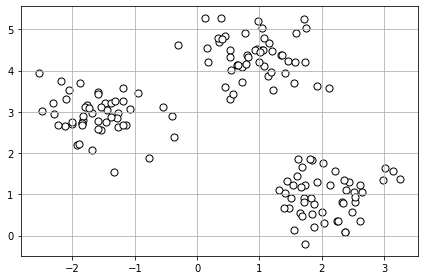

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

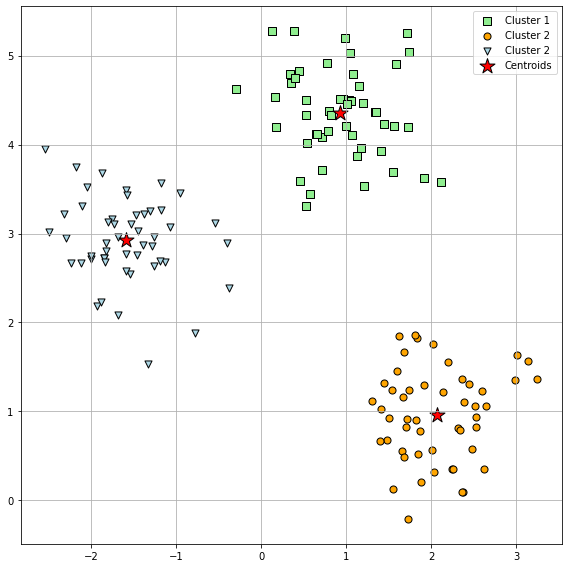

In [2]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    edgecolor='black',
    marker='s',
    label='Cluster 1'
)
plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    edgecolor='black',
    marker='o',
    label='Cluster 2'
)
plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50,
    c='lightblue',
    edgecolor='black',
    marker='v',
    label='Cluster 2'
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    c='red',
    edgecolor='black',
    marker='*',
    label='Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

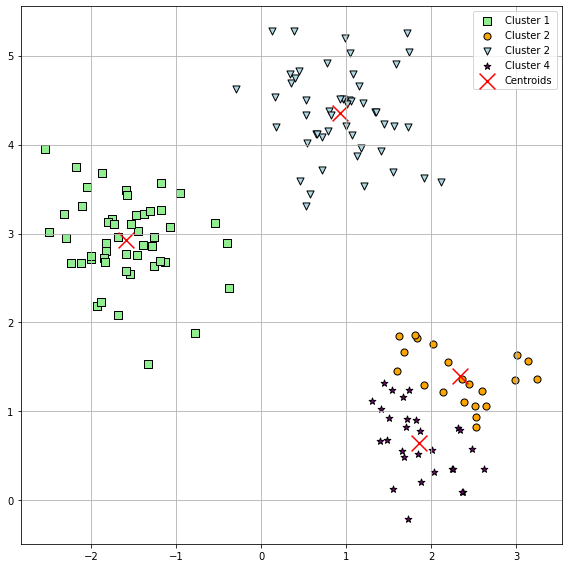

In [3]:
km = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    edgecolor='black',
    marker='s',
    label='Cluster 1'
)
plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    edgecolor='black',
    marker='o',
    label='Cluster 2'
)
plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50,
    c='lightblue',
    edgecolor='black',
    marker='v',
    label='Cluster 2'
)
plt.scatter(
    X[y_km == 3, 0],
    X[y_km == 3, 1],
    s=50,
    c='purple',
    edgecolor='black',
    marker='*',
    label='Cluster 4'
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    c='red',
    edgecolor='black',
    marker='x',
    label='Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
print(f'Distortion: {km.inertia_: .2f}')

Distortion:  62.84


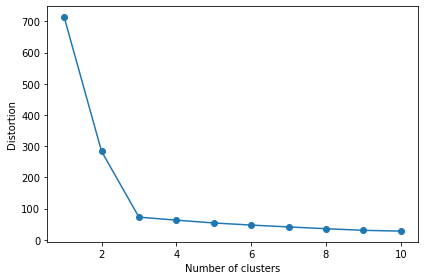

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

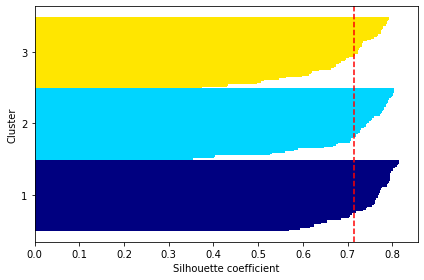

In [6]:
km = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

## Hierarchical Clustering

In [7]:
import pandas as pd

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [8]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [9]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(
    row_clusters,
    columns=[
        'row label 1',
        'row label 2',
        'distance',
        'no.  of item in clust.'
    ],
    index=[f'cluster {i + 1}' for i in range(row_clusters.shape[0])]
)

,row label 1,row label 2,distance,no. of item in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


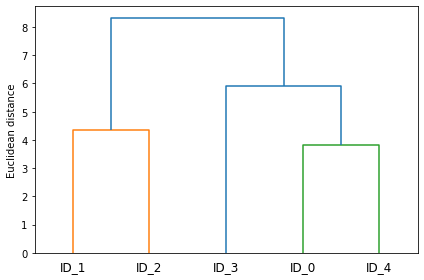

In [10]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(
    row_clusters,
    labels=labels
)
plt.ylabel('Euclidean distance')
plt.tight_layout()
plt.show()

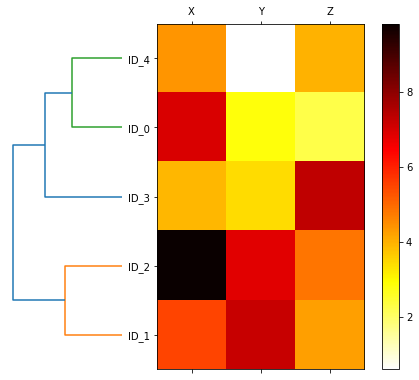

In [12]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(
    n_clusters=3,
    affinity='euclidean',
    linkage='complete'
)
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [14]:
ac = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    linkage='complete'
)
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


## DBSCAN(Density-based Spatial Clustering of Applications with Noise)

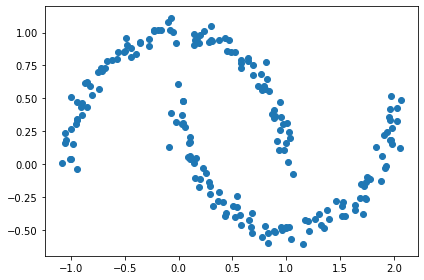

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=810)

plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

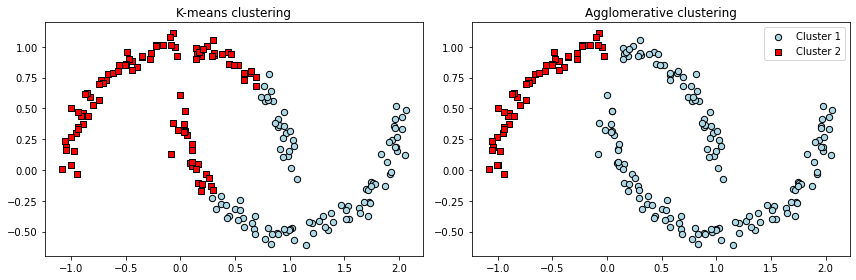

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

km = KMeans(n_clusters=2, random_state=11)
y_km = km.fit_predict(X)

ax1.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='Cluster 1'
)
ax1.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='Cluster 2'
)
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

ax2.scatter(
    X[y_ac == 0, 0],
    X[y_ac == 0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='Cluster 1'
)
ax2.scatter(
    X[y_ac == 1, 0],
    X[y_ac == 1, 1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='Cluster 2'
)
ax2.set_title('Agglomerative clustering')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

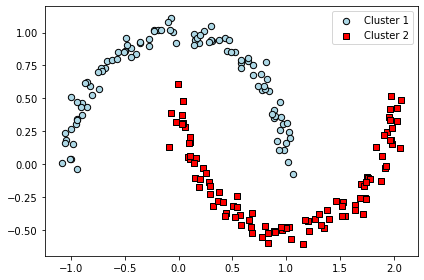

In [20]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(
    X[y_db == 0, 0],
    X[y_db == 0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='Cluster 1'
)
plt.scatter(
    X[y_db == 1, 0],
    X[y_db == 1, 1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='Cluster 2'
)
plt.legend(loc='best')
plt.tight_layout()
plt.show()